In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
def read_log(file_name):
    return pd.read_csv(file_name)

td3_log = read_log('./td3.csv')

## SAC

In [42]:
keys = ['avg_reward','loss_critic_1','loss_critic_2','train_reward','loss_policy']
sac_log_dict= {}
for key in keys:
    sac_log_dict[key] = read_log('./sac/sac_'+key+'.csv')

In [29]:
def plot_seaborn(data,x,y,x_label,y_label,save_as):
    sns.set_theme()
    ax = sns.lineplot(data=data,x=x,y=y)
    plt.tight_layout()
    ax.set(xlabel=x_label, ylabel=y_label)
    ax.figure.savefig(save_as)

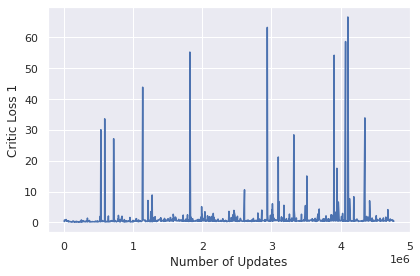

In [39]:
plot_seaborn(sac_log_dict['loss_critic_1'],'Step','Value','Number of Updates','Critic Loss 1','./sac/loss_critic_1')

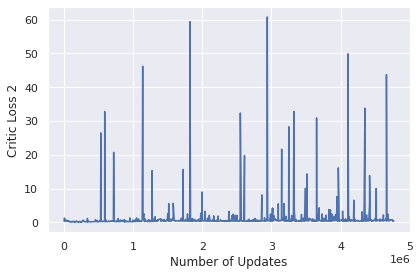

In [40]:
plot_seaborn(sac_log_dict['loss_critic_2'],'Step','Value','Number of Updates','Critic Loss 2','./sac/loss_critic_2')

In [ ]:
plot_seaborn(sac_log_dict['avg_reward'],'Step','Value','Episodes','Test Average Reward','./sac/test_avg_reward')

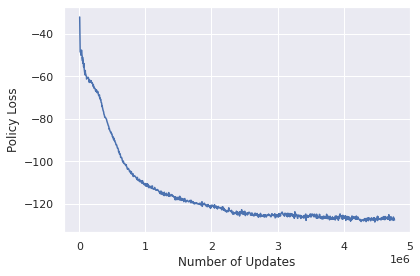

In [46]:
plot_seaborn(sac_log_dict['loss_policy'],'Step','Value','Number of Updates','Policy Loss','./sac/policy_loss')

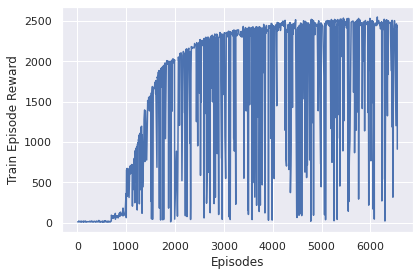

In [48]:
plot_seaborn(sac_log_dict['train_reward'],'Step','Value','Episodes','Train Episode Reward','./sac/train_reward')

## REDQ

In [49]:
redq_test = read_log('./redq/num_3_q_2_u2_train_reward.csv')

In [61]:
td3_step = td3_log['Step'].iloc[-1]

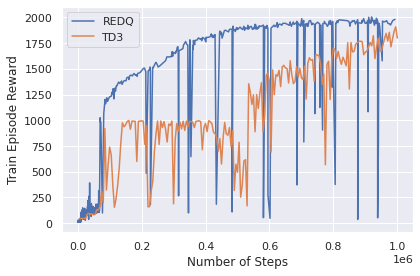

In [66]:
sns.lineplot(data=redq_test[redq_test['Step']<td3_step],x='Step',y='Value')
ax = sns.lineplot(data=td3_log,x='Step',y='Value')
plt.legend(labels=['REDQ','TD3'])
plt.tight_layout()
ax.set(xlabel='Number of Steps', ylabel='Train Episode Reward')
ax.figure.savefig('redq_td3')

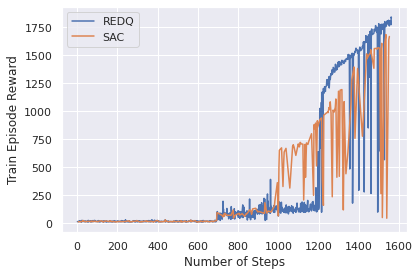

In [70]:
redq_test_epi = read_log('./redq/num_3_q_2_u2_train_reward_by_epi.csv')
max_reqd_step = redq_test_epi['Step'].iloc[-1]
sac_train_reward = sac_log_dict['train_reward']
sns.lineplot(data=redq_test_epi,x='Step',y='Value')
ax = sns.lineplot(data=sac_train_reward[sac_train_reward['Step']<max_reqd_step],x='Step',y='Value')
plt.legend(labels=['REDQ','SAC'])
plt.tight_layout()
ax.set(xlabel='Number of Steps', ylabel='Train Episode Reward')
ax.figure.savefig('redq_sac')

In [109]:
keys = ['avg_reward','loss_critic_1','loss_critic_2','train_reward','loss_policy']
redq_log_dict= {}
for key in keys:
    redq_log_dict[key] = read_log('./redq/'+key+'.csv')

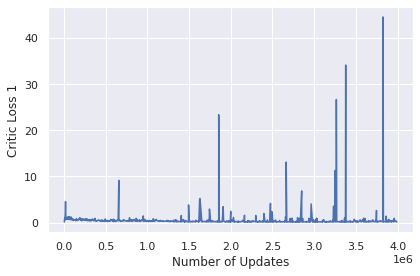

In [110]:
plot_seaborn(redq_log_dict['loss_critic_1'],'Step','Value','Number of Updates','Critic Loss 1','./redq/loss_critic_1')

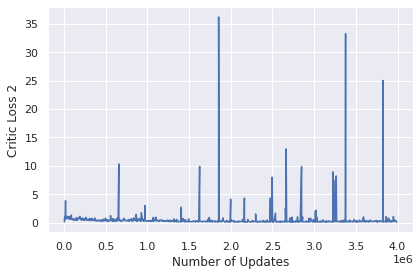

In [111]:
plot_seaborn(redq_log_dict['loss_critic_2'],'Step','Value','Number of Updates','Critic Loss 2','./redq/loss_critic_2')

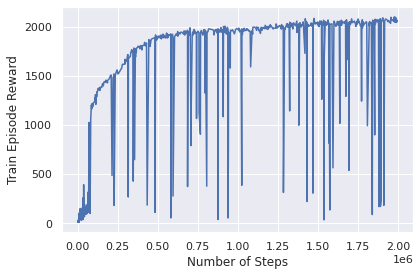

In [113]:
plot_seaborn(redq_log_dict['train_reward'],'Step','Value','Number of Steps','Train Episode Reward','./redq/train_reward')

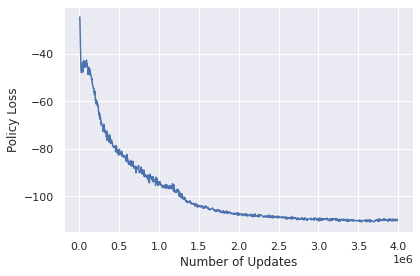

In [114]:
plot_seaborn(redq_log_dict['loss_policy'],'Step','Value','Number of Updates','Policy Loss','./redq/loss_policy')

## Dropout

In [71]:
utds =['utd_1','utd_2','utd_4']

In [74]:
utd_log_dict= {}
for key in utds:
    utd_log_dict[key] = read_log('./dropout/'+key+'.csv')

In [82]:
utd_log_dict['utd_4']

,Wall time,Step,Value
0,1.624156e+09,10,23.120020
1,1.624156e+09,20,15.335302
2,1.624156e+09,30,11.174451
3,1.624156e+09,40,17.131893
4,1.624156e+09,50,23.639856
...,...,...,...
177,1.624160e+09,1780,388.175842
178,1.624160e+09,1790,608.207092
179,1.624160e+09,1800,524.210999
180,1.624160e+09,1810,707.391357


In [95]:
utd_log_dict['utd_2']['Step'] /= 2

In [94]:
utd_log_dict['utd_4']['Step'] /= 4

In [98]:
max_step = utd_log_dict['utd_4']['Step'].iloc[-1]

In [102]:
utd_1 = utd_log_dict['utd_1']
utd_2 = utd_log_dict['utd_2']
utd_4 = utd_log_dict['utd_4']

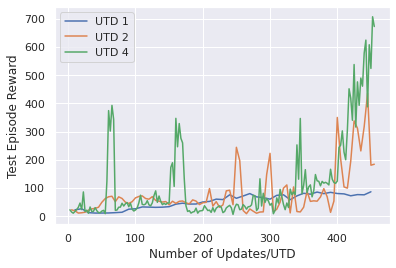

In [105]:
sns.lineplot(data=utd_1[utd_1['Step']<=max_step],x='Step',y='Value')
sns.lineplot(data=utd_2[utd_2['Step']<=max_step],x='Step',y='Value')
ax= sns.lineplot(data=utd_4,x='Step',y='Value')
ax.set(xlabel='Number of Updates/UTD', ylabel='Test Episode Reward')
plt.legend(labels=['UTD 1','UTD 2','UTD 4'])
ax.figure.savefig('./dropout/utd')